## Sequential Forward Selection (SFS)

### 1.Unbalanced Data

#### Import dataset

In [1]:
import pandas as pd
df = pd.read_csv("Finaltest.csv")

In [2]:
df.head()

,enrollment_id,username,course_id,source_browser,source_server,event_access,event_discussion,event_navigate,event_page_close,event_problem,event_video,event_wiki,Target
0,1,9Uee7oEuuMmgPx2IzPfFkWgkHZyPbWr0,0,195,119,107,0,25,66,87,29,0,0
1,3,1qXC7Fjbwp66GPQc6pHLfEuO8WKozxG4,0,200,88,79,26,14,22,138,9,0,0
2,4,FIHlppZyoq8muPbdVxS44gfvceX9zvU7,0,19,80,64,0,15,10,6,4,0,0
3,5,p1Mp7WkVfzUijX0peVQKSHbgd5pXyl4c,0,431,202,226,34,30,87,170,86,0,0
4,6,dpK33RH9yepUAnyoywRwBt1AJzxGlaja,0,6,17,12,0,5,2,2,2,0,0


In [3]:
df.shape

(120542, 13)

In [4]:
#Check missing value
df.isnull().sum()

enrollment_id       0
username            0
course_id           0
source_browser      0
source_server       0
event_access        0
event_discussion    0
event_navigate      0
event_page_close    0
event_problem       0
event_video         0
event_wiki          0
Target              0
dtype: int64

In [5]:
#check if any missing value
df[df.isnull().any(axis=1)]

,enrollment_id,username,course_id,source_browser,source_server,event_access,event_discussion,event_navigate,event_page_close,event_problem,event_video,event_wiki,Target


#### Drop columns

In [6]:
#df=df.drop(columns='id_student')
df=df.drop(columns='username')
df=df.drop(columns='enrollment_id')

In [7]:
df.shape

(120542, 11)

### Target Feature and Dependent Feature

In [8]:
X = df.iloc[:,0:10] # all columns/features except target 
y = df.iloc[:,-1]  #target

In [9]:
X

,course_id,source_browser,source_server,event_access,event_discussion,event_navigate,event_page_close,event_problem,event_video,event_wiki
0,0,195,119,107,0,25,66,87,29,0
1,0,200,88,79,26,14,22,138,9,0
2,0,19,80,64,0,15,10,6,4,0
3,0,431,202,226,34,30,87,170,86,0
4,0,6,17,12,0,5,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...
120537,0,0,1,0,0,1,0,0,0,0
120538,0,0,1,0,0,1,0,0,0,0
120539,0,3,5,3,0,2,2,0,1,0
120540,0,0,1,0,0,1,0,0,0,0


In [10]:
y

0         0
1         0
2         0
3         0
4         0
         ..
120537    1
120538    1
120539    1
120540    1
120541    1
Name: Target, Length: 120542, dtype: int64

### Split and Train Data

In [11]:
from sklearn.model_selection import StratifiedKFold, train_test_split

#training 0.3,
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y, random_state=42)

### Feature Selection Models

In [12]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [14]:
X_train.shape

(84379, 10)

### Algorithms

In [15]:
ffs_lr=SequentialFeatureSelector(LogisticRegression(),k_features="best",forward=False,floating=False, verbose=2,scoring= "f1",cv= 5, n_jobs=-1).fit(X_train, y_train)  
ffs_lr.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    4.1s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished

[2022-11-20 23:11:55] Features: 9/1 -- score: 0.9134457446867513[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    1.7s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    2.5s finished

[2022-11-20 23:11:58] Features: 8/1 -- score: 0.9138395928803877[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    1.1s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.4s finished

[2022-11-20 23:11:59] Features: 7/1 -- score: 0.91390122582836[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.91159635, 0.91279008, 0.91696725, 0.91347377, 0.91236894]),
  'avg_score': 0.9134392810903995,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 9),
  'cv_scores': array([0.91159635, 0.91279008, 0.91696725, 0.91347377, 0.91240126]),
  'avg_score': 0.9134457446867513,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_wiki')},
 8: {'feature_idx': (0, 1, 2, 4, 5, 6, 7, 9),
  'cv_scores': array([0.91194857, 0.91294217, 0.91717043, 0.91397469, 0.91316209]),
  'avg_score': 0.9138395928803877,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'e

In [16]:
ffs_naivebayes=SequentialFeatureSelector(GaussianNB(),k_features="best",forward=False,floating=False, verbose=2,scoring= "f1",cv= 5, n_jobs=-1).fit(X_train, y_train)  
ffs_naivebayes.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished

[2022-11-20 23:12:04] Features: 9/1 -- score: 0.9103537921666689[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.3s finished

[2022-11-20 23:12:05] Features: 8/1 -- score: 0.9109205595183957[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.2s finished

[2022-11-20 23:12:05] Features: 7/1 -- score: 0.9115805897983564[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.90807839, 0.90834493, 0.91080047, 0.90915591, 0.91065292]),
  'avg_score': 0.9094065250002592,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8),
  'cv_scores': array([0.90929883, 0.90933781, 0.91215007, 0.90995634, 0.91102591]),
  'avg_score': 0.9103537921666689,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video')},
 8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8),
  'cv_scores': array([0.90977954, 0.90983167, 0.91313681, 0.91064652, 0.91120826]),
  'avg_score': 0.9109205595183957,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   '

In [17]:
ffs_dtree=SequentialFeatureSelector(DecisionTreeClassifier(),k_features= "best",forward=False,floating=False,verbose=2,scoring= "f1", cv= 5, n_jobs=-1).fit(X_train, y_train)
ffs_dtree.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.8s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished

[2022-11-20 23:18:27] Features: 9/1 -- score: 0.8779641997567683[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    1.1s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.8s finished

[2022-11-20 23:18:29] Features: 8/1 -- score: 0.8816827351242246[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.7s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.8s finished

[2022-11-20 23:18:30] Features: 7/1 -- score: 0.8830738773578879[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.87875763, 0.8796923 , 0.87689738, 0.87902898, 0.87533805]),
  'avg_score': 0.8779428663946923,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 9: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.87627225, 0.8762879 , 0.87910542, 0.87999111, 0.87816432]),
  'avg_score': 0.8779641997567683,
  'feature_names': ('course_id',
   'source_browser',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 8: {'feature_idx': (0, 1, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.88065359, 0.87952828, 0.88369009, 0.88461821, 0.8799235 ]),
  'avg_score': 0.8816827351242246,
  'feature_names': ('course_id',
   'source_browser',
   'event_discussion',
   '

In [18]:
ffs_mlp= SequentialFeatureSelector(MLPClassifier(max_iter=2000),k_features="best",forward=False,floating=False,verbose=2,scoring= "f1", cv= 5, n_jobs=-1).fit(X_train, y_train)
ffs_mlp.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  1.2min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.7min finished

[2022-11-20 23:20:42] Features: 9/1 -- score: 0.9151923225822813[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  1.1min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.3min finished

[2022-11-20 23:22:01] Features: 8/1 -- score: 0.9148846119829253[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   44.5s remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.2min finished

[2022-11-20 23:23:12] Features: 7/1 -- score: 0.9145431416786943[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.91525543, 0.91286628, 0.91893045, 0.91374249, 0.90710646]),
  'avg_score': 0.9135802208609454,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 9: {'feature_idx': (0, 1, 2, 3, 4, 6, 7, 8, 9),
  'cv_scores': array([0.91496171, 0.91451349, 0.91571439, 0.91632276, 0.91444927]),
  'avg_score': 0.9151923225822813,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 8: {'feature_idx': (0, 1, 2, 3, 4, 6, 7, 9),
  'cv_scores': array([0.91333357, 0.91388489, 0.91772083, 0.91642651, 0.91305725]),
  'avg_score': 0.9148846119829253,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'even

In [19]:
ffs_randomforest = SequentialFeatureSelector(RandomForestClassifier(),k_features="best",forward=False,floating=False,verbose=2,scoring= "f1", cv= 5, n_jobs=-1).fit(X_train, y_train)   
ffs_randomforest.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   39.5s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   41.6s finished

[2022-11-20 23:31:09] Features: 9/1 -- score: 0.9106375861104823[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   30.2s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   31.3s finished

[2022-11-20 23:31:41] Features: 8/1 -- score: 0.9108827612489179[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   26.2s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   27.3s finished

[2022-11-20 23:32:08] Features: 7/1 -- score: 0.9104528386110555[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.90993722, 0.90894655, 0.91413503, 0.91178276, 0.90902509]),
  'avg_score': 0.9107653290006358,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 9: {'feature_idx': (0, 1, 2, 3, 5, 6, 7, 8, 9),
  'cv_scores': array([0.90953739, 0.90914346, 0.912822  , 0.91152234, 0.91016275]),
  'avg_score': 0.9106375861104823,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 8: {'feature_idx': (1, 2, 3, 5, 6, 7, 8, 9),
  'cv_scores': array([0.9088351 , 0.90945209, 0.91384171, 0.91124774, 0.91103718]),
  'avg_score': 0.9108827612489179,
  'feature_names': ('source_browser',
   'source_server',
   'event_access',
   'eve

In [20]:
ffs_knn= SequentialFeatureSelector(KNeighborsClassifier(),k_features="best",forward=False, floating=False,verbose=2,scoring= "f1",cv= 5, n_jobs=-1).fit(X_train, y_train)
ffs_knn.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   15.9s remaining:   37.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.4s finished

[2022-11-20 23:34:12] Features: 9/1 -- score: 0.9056014759945029[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   13.8s remaining:   27.7s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   15.9s finished

[2022-11-20 23:34:28] Features: 8/1 -- score: 0.9061982973551412[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   10.9s remaining:   32.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   12.5s finished

[2022-11-20 23:34:41] Features: 7/1 -- score: 0.9066824051688682[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.90529741, 0.90311594, 0.90801895, 0.90470665, 0.90399333]),
  'avg_score': 0.9050264572765577,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 9: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.90286624, 0.90480324, 0.90947201, 0.90632471, 0.90454117]),
  'avg_score': 0.9056014759945029,
  'feature_names': ('course_id',
   'source_browser',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 8: {'feature_idx': (0, 1, 3, 5, 6, 7, 8, 9),
  'cv_scores': array([0.90493085, 0.90555515, 0.90890007, 0.90796128, 0.90364414]),
  'avg_score': 0.9061982973551412,
  'feature_names': ('course_id',
   'source_browser',
   'event_access',
   'even

In [55]:
ffs_svc= SequentialFeatureSelector(SVC(),k_features="best",forward=False, floating=False,verbose=2,scoring= "f1",cv= 5, n_jobs=-1).fit(X_train, y_train)
ffs_svc.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed: 57.4min remaining: 133.8min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 72.3min finished

[2022-11-21 02:36:37] Features: 9/1 -- score: 0.9152491569764681[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed: 48.5min remaining: 97.1min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 53.8min finished

[2022-11-21 03:30:28] Features: 8/1 -- score: 0.9153711118388305[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed: 55.4min remaining: 166.3min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 62.3min finished

[2022-11-21 04:32:49] Features: 7/1 -- score: 0.9153919370350208[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of 

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.91277703, 0.9142796 , 0.91762609, 0.91551054, 0.91454487]),
  'avg_score': 0.91494762506341,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 9: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.91319679, 0.9144385 , 0.91776867, 0.91561542, 0.9152264 ]),
  'avg_score': 0.9152491569764681,
  'feature_names': ('course_id',
   'source_browser',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 8: {'feature_idx': (0, 1, 3, 5, 6, 7, 8, 9),
  'cv_scores': array([0.91324949, 0.91449363, 0.91795329, 0.91567726, 0.91548189]),
  'avg_score': 0.9153711118388305,
  'feature_names': ('course_id',
   'source_browser',
   'event_access',
   'event_

### Significant Features

In [21]:
ffs_lr.k_feature_idx_ 

(0, 1, 2, 4, 5, 6, 9)

In [22]:
ffs_naivebayes.k_feature_idx_ 

(0, 2, 3, 6)

In [23]:
ffs_dtree.k_feature_idx_ 

(0, 5)

In [24]:
ffs_mlp.k_feature_idx_ 

(0, 1, 2, 3, 4, 6, 7, 8, 9)

In [25]:
ffs_randomforest.k_feature_idx_ 

(2,)

In [56]:
ffs_svc.k_feature_idx_ 

(1, 3, 5, 6, 7, 8, 9)

In [ ]:
ffs_knn.k_feature_idx_ 

### Name of Significant Features

In [27]:
ffs_lr.k_feature_names_ #name of the features choosen

('course_id',
 'source_browser',
 'source_server',
 'event_discussion',
 'event_navigate',
 'event_page_close',
 'event_wiki')

In [28]:
ffs_naivebayes.k_feature_names_ #name of the features choosen

('course_id', 'source_server', 'event_access', 'event_page_close')

In [29]:
ffs_dtree.k_feature_names_ #name of the features choosen

('course_id', 'event_navigate')

In [30]:
ffs_mlp.k_feature_names_ #name of the features choosen

('course_id',
 'source_browser',
 'source_server',
 'event_access',
 'event_discussion',
 'event_page_close',
 'event_problem',
 'event_video',
 'event_wiki')

In [31]:
ffs_randomforest.k_feature_names_ #name of the features choosen

('source_server',)

In [57]:
ffs_svc.k_feature_names_ #name of the features choosen

('source_browser',
 'event_access',
 'event_navigate',
 'event_page_close',
 'event_problem',
 'event_video',
 'event_wiki')

In [33]:
ffs_knn.k_feature_names_ #name of the features choosen

('course_id',
 'source_browser',
 'event_access',
 'event_navigate',
 'event_page_close',
 'event_problem',
 'event_video')

#### Highest Fscore based on Algorithms

In [34]:
ffs_lr.k_score_

0.91390122582836

In [35]:
ffs_naivebayes.k_score_

0.9129905930641341

In [36]:
ffs_dtree.k_score_

0.9046232188703758

In [37]:
ffs_mlp.k_score_

0.9151923225822813

In [38]:
ffs_randomforest.k_score_

0.9113684446047534

In [58]:
ffs_svc.k_score_

0.9153919370350208

In [40]:
ffs_knn.k_score_

0.9066824051688682

### Tabulated Result and Graph

In [41]:
download=pd.DataFrame.from_dict(ffs_naivebayes.get_metric_dict()).T
download.to_csv("Backward.gaussian.csv")
pd.DataFrame.from_dict(ffs_naivebayes.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9080783921750617, 0.9083449284669449, 0.910...",0.909407,"(course_id, source_browser, source_server, eve...",0.00146,0.001136,0.000568
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.9092988349653348, 0.9093378122431476, 0.912...",0.910354,"(course_id, source_browser, source_server, eve...",0.001406,0.001094,0.000547
8,"(0, 1, 2, 3, 4, 5, 6, 8)","[0.9097795405009468, 0.9098316714913691, 0.913...",0.910921,"(course_id, source_browser, source_server, eve...",0.00158,0.001229,0.000615
7,"(0, 1, 2, 3, 4, 5, 6)","[0.9107060040669259, 0.9099925082943884, 0.914...",0.911581,"(course_id, source_browser, source_server, eve...",0.002054,0.001598,0.000799
6,"(0, 2, 3, 4, 5, 6)","[0.9115142012045188, 0.9104435110699792, 0.915...",0.91215,"(course_id, source_server, event_access, event...",0.00217,0.001688,0.000844
5,"(0, 2, 3, 5, 6)","[0.9117952761549765, 0.91131892937762, 0.91558...",0.912912,"(course_id, source_server, event_access, event...",0.002031,0.00158,0.00079
4,"(0, 2, 3, 6)","[0.9111776447105788, 0.9123707664884135, 0.915...",0.912991,"(course_id, source_server, event_access, event...",0.001779,0.001384,0.000692
3,"(2, 3, 6)","[0.9111776447105788, 0.9123707664884135, 0.915...",0.912991,"(source_server, event_access, event_page_close)",0.001779,0.001384,0.000692
2,"(2, 6)","[0.9118316268486917, 0.9115525390000355, 0.914...",0.912716,"(source_server, event_page_close)",0.001299,0.00101,0.000505
1,"(2,)","[0.9093259722561935, 0.9114321608040201, 0.912...",0.910886,"(source_server,)",0.001286,0.001,0.0005


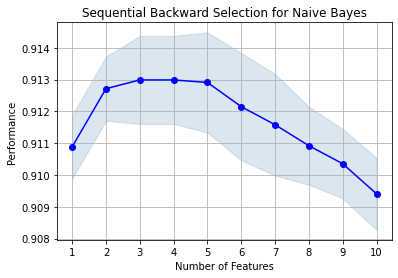

In [42]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(ffs_naivebayes.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection for Naive Bayes')
plt.grid()
plt.show()

In [43]:
download=pd.DataFrame.from_dict(ffs_dtree.get_metric_dict()).T
download.to_csv("Backward.desiciontree.csv")
pd.DataFrame.from_dict(ffs_dtree.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.8787576261785913, 0.8796922963127335, 0.876...",0.877943,"(course_id, source_browser, source_server, eve...",0.002055,0.001599,0.000799
9,"(0, 1, 3, 4, 5, 6, 7, 8, 9)","[0.8762722528590992, 0.8762878956341265, 0.879...",0.877964,"(course_id, source_browser, event_access, even...",0.001917,0.001492,0.000746
8,"(0, 1, 4, 5, 6, 7, 8, 9)","[0.8806535899606227, 0.8795282845034089, 0.883...",0.881683,"(course_id, source_browser, event_discussion, ...",0.002662,0.002071,0.001035
7,"(0, 4, 5, 6, 7, 8, 9)","[0.8834644511432982, 0.8826401380272384, 0.884...",0.883074,"(course_id, event_discussion, event_navigate, ...",0.002513,0.001955,0.000978
6,"(0, 4, 5, 6, 7, 9)","[0.887391652705951, 0.8864639976643188, 0.8860...",0.88701,"(course_id, event_discussion, event_navigate, ...",0.001014,0.000789,0.000395
5,"(0, 4, 5, 7, 9)","[0.8927270760465871, 0.8896127397756063, 0.892...",0.891284,"(course_id, event_discussion, event_navigate, ...",0.002313,0.0018,0.0009
4,"(0, 5, 7, 9)","[0.8988233611101177, 0.897457992244722, 0.9015...",0.898988,"(course_id, event_navigate, event_problem, eve...",0.002124,0.001653,0.000826
3,"(0, 5, 9)","[0.9036499982229804, 0.9046300241442977, 0.905...",0.90424,"(course_id, event_navigate, event_wiki)",0.001157,0.0009,0.00045
2,"(0, 5)","[0.9041446176794402, 0.9040443528324685, 0.906...",0.904623,"(course_id, event_navigate)",0.001271,0.000989,0.000494
1,"(5,)","[0.9041446176794402, 0.9040443528324685, 0.906...",0.904623,"(event_navigate,)",0.001271,0.000989,0.000494


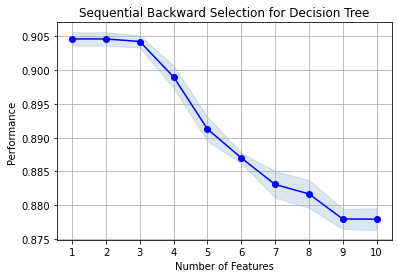

In [44]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig2 = plot_sfs(ffs_dtree.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection for Decision Tree')
plt.grid()
plt.show()

In [45]:
download=pd.DataFrame.from_dict(ffs_mlp.get_metric_dict()).T
download.to_csv("Backward.mlp.csv")
pd.DataFrame.from_dict(ffs_mlp.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9152554307643559, 0.9128662778441432, 0.918...",0.91358,"(course_id, source_browser, source_server, eve...",0.00494,0.003844,0.001922
9,"(0, 1, 2, 3, 4, 6, 7, 8, 9)","[0.9149617057998634, 0.9145134885045199, 0.915...",0.915192,"(course_id, source_browser, source_server, eve...",0.00093,0.000723,0.000362
8,"(0, 1, 2, 3, 4, 6, 7, 9)","[0.9133335737728567, 0.913884892086331, 0.9177...",0.914885,"(course_id, source_browser, source_server, eve...",0.002382,0.001853,0.000926
7,"(0, 1, 2, 3, 4, 7, 9)","[0.9139913080050469, 0.9126488527446994, 0.918...",0.914543,"(course_id, source_browser, source_server, eve...",0.002802,0.00218,0.00109
6,"(1, 2, 3, 4, 7, 9)","[0.9132393756983743, 0.912285786746857, 0.9176...",0.914271,"(source_browser, source_server, event_access, ...",0.002501,0.001946,0.000973
5,"(1, 2, 3, 4, 7)","[0.9143653317137652, 0.9127210908959381, 0.917...",0.914906,"(source_browser, source_server, event_access, ...",0.00204,0.001587,0.000794
4,"(1, 2, 4, 7)","[0.909243758909317, 0.9111966308451931, 0.9163...",0.913325,"(source_browser, source_server, event_discussi...",0.003444,0.00268,0.00134
3,"(1, 2, 4)","[0.9074724434090199, 0.9103970557010405, 0.914...",0.911241,"(source_browser, source_server, event_discussion)",0.002917,0.00227,0.001135
2,"(2, 4)","[0.9106930049474559, 0.9112987246272678, 0.910...",0.911228,"(source_server, event_discussion)",0.000941,0.000732,0.000366
1,"(2,)","[0.8932938406622618, 0.905511811023622, 0.9136...",0.906965,"(source_server,)",0.009435,0.007341,0.003671


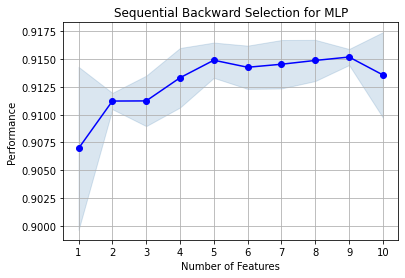

In [46]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig3 = plot_sfs(ffs_mlp.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection for MLP')
plt.grid()
plt.show()

In [47]:
download=pd.DataFrame.from_dict(ffs_randomforest.get_metric_dict()).T
download.to_csv("Backward.randomforest.csv")
pd.DataFrame.from_dict(ffs_randomforest.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.909937215847586, 0.9089465516619148, 0.9141...",0.910765,"(course_id, source_browser, source_server, eve...",0.002533,0.00197,0.000985
9,"(0, 1, 2, 3, 5, 6, 7, 8, 9)","[0.909537394821422, 0.9091434558000072, 0.9128...",0.910638,"(course_id, source_browser, source_server, eve...",0.001746,0.001358,0.000679
8,"(1, 2, 3, 5, 6, 7, 8, 9)","[0.9088350950611492, 0.9094520894282515, 0.913...",0.910883,"(source_browser, source_server, event_access, ...",0.002237,0.001741,0.00087
7,"(2, 3, 5, 6, 7, 8, 9)","[0.9078890333766798, 0.9102855698761687, 0.913...",0.910453,"(source_server, event_access, event_navigate, ...",0.002223,0.00173,0.000865
6,"(2, 3, 5, 6, 7, 8)","[0.9083616390836164, 0.9080659150043365, 0.911...",0.909324,"(source_server, event_access, event_navigate, ...",0.001422,0.001106,0.000553
5,"(2, 3, 6, 7, 8)","[0.9062307887028532, 0.907295547437335, 0.9091...",0.907556,"(source_server, event_access, event_page_close...",0.001208,0.00094,0.00047
4,"(2, 6, 7, 8)","[0.9065748958522006, 0.9041761909945213, 0.906...",0.905175,"(source_server, event_page_close, event_proble...",0.002157,0.001678,0.000839
3,"(2, 6, 7)","[0.9041105830279723, 0.9029658402003848, 0.902...",0.902997,"(source_server, event_page_close, event_problem)",0.0012,0.000934,0.000467
2,"(2, 7)","[0.9044887422916966, 0.903341459916822, 0.9072...",0.904662,"(source_server, event_problem)",0.001864,0.00145,0.000725
1,"(2,)","[0.9099906763250377, 0.9104252104467947, 0.915...",0.911368,"(source_server,)",0.002621,0.002039,0.00102


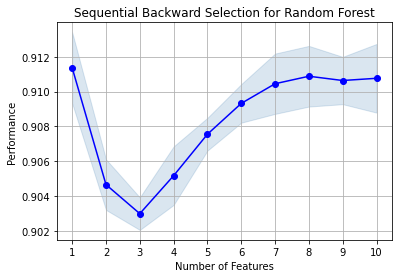

In [48]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig4 = plot_sfs(ffs_randomforest.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection for Random Forest')
plt.grid()
plt.show()

In [59]:
download=pd.DataFrame.from_dict(ffs_svc.get_metric_dict()).T
download.to_csv("Backward.SVM.csv")
pd.DataFrame.from_dict(ffs_svc.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9127770255825555, 0.9142795990439839, 0.917...",0.914948,"(course_id, source_browser, source_server, eve...",0.002057,0.001601,0.0008
9,"(0, 1, 3, 4, 5, 6, 7, 8, 9)","[0.9131967943009794, 0.9144385026737968, 0.917...",0.915249,"(course_id, source_browser, event_access, even...",0.001937,0.001507,0.000753
8,"(0, 1, 3, 5, 6, 7, 8, 9)","[0.913249492322491, 0.9144936325045481, 0.9179...",0.915371,"(course_id, source_browser, event_access, even...",0.001995,0.001552,0.000776
7,"(1, 3, 5, 6, 7, 8, 9)","[0.9132882080513003, 0.9144936325045481, 0.917...",0.915392,"(source_browser, event_access, event_navigate,...",0.001983,0.001543,0.000771
6,"(1, 3, 5, 6, 7, 8)","[0.9130496757180528, 0.9141837644959857, 0.918...",0.91528,"(source_browser, event_access, event_navigate,...",0.002157,0.001678,0.000839
5,"(1, 3, 5, 6, 7)","[0.9127258472613236, 0.9139205255453605, 0.918...",0.915012,"(source_browser, event_access, event_navigate,...",0.002265,0.001762,0.000881
4,"(3, 5, 6, 7)","[0.9117363860062051, 0.913183050363818, 0.9173...",0.914334,"(event_access, event_navigate, event_page_clos...",0.002437,0.001896,0.000948
3,"(5, 6, 7)","[0.9118722271517302, 0.9119487908961594, 0.916...",0.91393,"(event_navigate, event_page_close, event_problem)",0.002482,0.001931,0.000966
2,"(5, 6)","[0.9097101500691808, 0.9094850563275171, 0.914...",0.911449,"(event_navigate, event_page_close)",0.002306,0.001794,0.000897
1,"(6,)","[0.9069546557849931, 0.9076571026227778, 0.909...",0.907802,"(event_page_close,)",0.000913,0.00071,0.000355


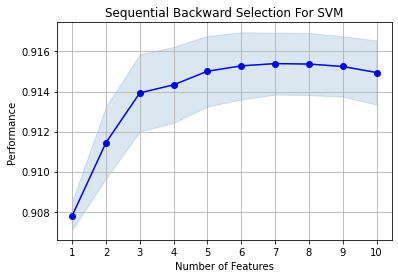

In [60]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig5 = plot_sfs(ffs_svc.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection For SVM')
plt.grid()
plt.show()

In [51]:
download=pd.DataFrame.from_dict(ffs_knn.get_metric_dict()).T
download.to_csv("Backward.knn.csv")
pd.DataFrame.from_dict(ffs_knn.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9052974145724101, 0.9031159420289855, 0.908...",0.905026,"(course_id, source_browser, source_server, eve...",0.002139,0.001664,0.000832
9,"(0, 1, 3, 4, 5, 6, 7, 8, 9)","[0.9028662420382165, 0.9048032407407407, 0.909...",0.905601,"(course_id, source_browser, event_access, even...",0.002859,0.002225,0.001112
8,"(0, 1, 3, 5, 6, 7, 8, 9)","[0.9049308522192456, 0.9055551531831679, 0.908...",0.906198,"(course_id, source_browser, event_access, even...",0.002502,0.001947,0.000973
7,"(0, 1, 3, 5, 6, 7, 8)","[0.9058895838605879, 0.9066772770020978, 0.908...",0.906682,"(course_id, source_browser, event_access, even...",0.002016,0.001569,0.000784
6,"(1, 3, 5, 6, 7, 8)","[0.9058895838605879, 0.9066772770020978, 0.908...",0.906682,"(source_browser, event_access, event_navigate,...",0.002016,0.001569,0.000784
5,"(1, 3, 6, 7, 8)","[0.9063132042762206, 0.9034267912772586, 0.908...",0.905833,"(source_browser, event_access, event_page_clos...",0.002012,0.001565,0.000783
4,"(1, 3, 6, 7)","[0.9055593735305819, 0.9044590590445905, 0.907...",0.905902,"(source_browser, event_access, event_page_clos...",0.001539,0.001197,0.000599
3,"(3, 6, 7)","[0.8996487161844059, 0.9025459022923985, 0.907...",0.903395,"(event_access, event_page_close, event_problem)",0.003213,0.002499,0.00125
2,"(3, 7)","[0.9011140046296295, 0.8998298519349818, 0.899...",0.899895,"(event_access, event_problem)",0.000812,0.000631,0.000316
1,"(3,)","[0.8549190535491906, 0.8949274037230734, 0.897...",0.887505,"(event_access,)",0.021178,0.016477,0.008238


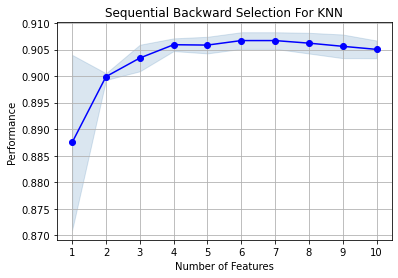

In [52]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig5 = plot_sfs(ffs_knn.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection For KNN')
plt.grid()
plt.show()

In [53]:
download=pd.DataFrame.from_dict(ffs_lr.get_metric_dict()).T
download.to_csv("Backward.lr.csv")
pd.DataFrame.from_dict(ffs_lr.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9115963536145856, 0.9127900815937269, 0.916...",0.913439,"(course_id, source_browser, source_server, eve...",0.002398,0.001866,0.000933
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)","[0.9115963536145856, 0.9127900815937269, 0.916...",0.913446,"(course_id, source_browser, source_server, eve...",0.002394,0.001862,0.000931
8,"(0, 1, 2, 4, 5, 6, 7, 9)","[0.9119485748596051, 0.9129421732683753, 0.917...",0.91384,"(course_id, source_browser, source_server, eve...",0.002296,0.001786,0.000893
7,"(0, 1, 2, 4, 5, 6, 9)","[0.9119734472652803, 0.9131278901479049, 0.917...",0.913901,"(course_id, source_browser, source_server, eve...",0.00223,0.001735,0.000868
6,"(1, 2, 4, 5, 6, 9)","[0.9119734472652803, 0.9131278901479049, 0.917...",0.913901,"(source_browser, source_server, event_discussi...",0.00223,0.001735,0.000868
5,"(1, 2, 4, 6, 9)","[0.912275745161746, 0.9128823965279983, 0.9163...",0.913679,"(source_browser, source_server, event_discussi...",0.001889,0.00147,0.000735
4,"(2, 4, 6, 9)","[0.9121146852159175, 0.913135593220339, 0.9161...",0.913668,"(source_server, event_discussion, event_page_c...",0.001737,0.001351,0.000676
3,"(2, 4, 6)","[0.9119277065904197, 0.9131923606453207, 0.915...",0.91339,"(source_server, event_discussion, event_page_c...",0.001618,0.001259,0.000629
2,"(2, 4)","[0.9113307447935051, 0.9125829685072729, 0.915...",0.913101,"(source_server, event_discussion)",0.002083,0.001621,0.00081
1,"(2,)","[0.9102631857097557, 0.912184489910708, 0.9133...",0.911661,"(source_server,)",0.00136,0.001058,0.000529


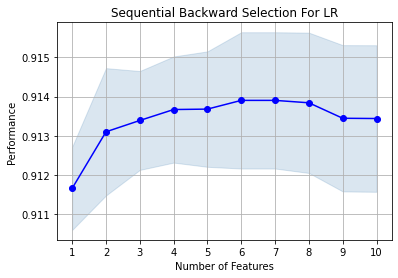

In [54]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig5 = plot_sfs(ffs_lr.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection For LR')
plt.grid()
plt.show()